<a href="https://colab.research.google.com/github/pribullock/california-housing-ml/blob/main/Machine_Learning_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting California Housing Prices Using Supervised Learning

## Overview

This project applies supervised machine learning techniques to predict median housing prices in California census block groups using demographic and geographic features. The dataset, sourced from the 1990 U.S. Census and available through Scikit-learn, includes information such as median income, average house age, household size, and geographic coordinates.

My primary objective is to evaluate and compare the performance of multiple regression models including Linear Regression and Random Forest Regressor in predicting continuous housing values. The workflow includes data exploration, preprocessing, model training, and performance evaluation, with a focus on interpretability and practical implications for housing economics and urban planning.



In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

housing = fetch_california_housing(as_frame=True)
df = housing.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Data Preprocessing

To prepare the data for modeling, I split it into training and test sets (80/20 split). Since some models (like Linear Regression) are sensitive to feature scaling, we applied standardization using `StandardScaler`.

The target variable is `MedHouseVal` is the median house value in each census block group (measured in hundreds of thousands of dollars).



In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Model 1: Linear Regression

As a baseline model, we can start with a trained a Linear Regression model on the scaled training data. This model assumes a linear relationship between the features and target variable, which is useful for establishing a performance benchmark.


In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = lr.predict(X_test_scaled)

# Evaluate
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr:.4f}")
print(f"Linear Regression R²: {r2_lr:.4f}")


Linear Regression MSE: 0.5559
Linear Regression R²: 0.5758


The Linear Regression model achieved an R² score of approximately **0.5758** and an MSE of **0.5559**. While easy to interpret, its performance is limited by its inability to capture non-linear relationships in the housing data.


## Model 2: Random Forest Regressor

To better model complex, non-linear relationships, the next model is a trained Random Forest Regressor. The idea is that the Random Forest learning method will build multiple decision trees and average their outputs to improve accuracy and reduce overfitting.

I used default hyperparameters with 100 trees and evaluated model performance on the test set.


In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MSE: {mse_rf:.4f}")
print(f"Random Forest R²: {r2_rf:.4f}")


Random Forest MSE: 0.2554
Random Forest R²: 0.8051


The Random Forest model achieved an R² score of approximately **0.8051** and an MSE of **0.2554**, significantly outperforming Linear Regression. This indicates a better fit to the data and improved generalization.


## Feature Importance Analysis

One benefit of tree-based models is the ability to interpret which features most strongly influence predictions. The plot below shows the top contributing variables in the Random Forest model.


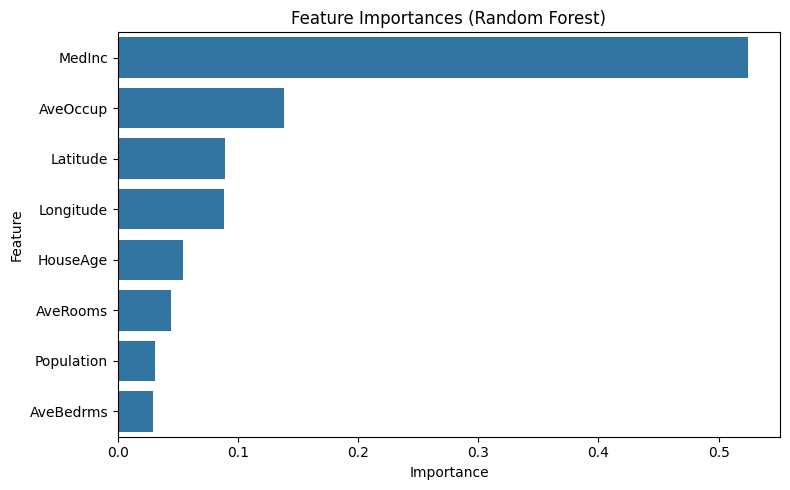

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature importances
importances = rf.feature_importances_
features = X.columns
sorted_idx = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=importances[sorted_idx], y=features[sorted_idx])
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()



## Model Evaluation: Actual vs. Predicted

The plot below compares predicted median house values with actual values from the test set. Ideally, all points would fall along the red dashed line, indicating perfect predictions.

The clustering of points around the line suggests strong performance, particularly for lower to mid-range home values. Some underprediction is observed at the higher end, which may reflect the ceiling effect in the dataset (max value of 5).


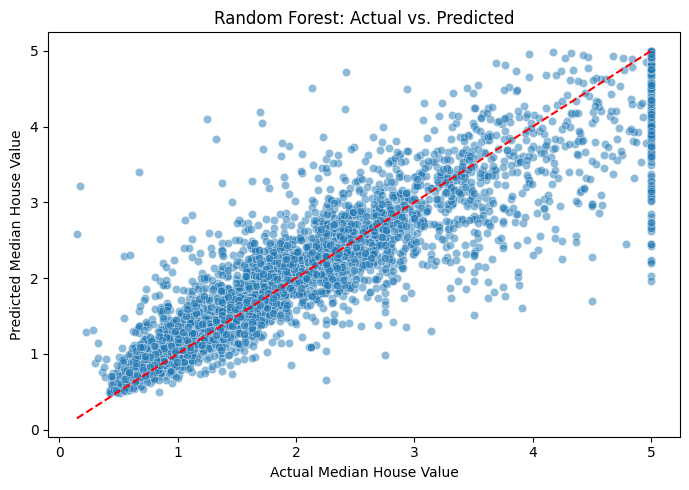

In [6]:
# Actual vs. Predicted for Random Forest
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Random Forest: Actual vs. Predicted')
plt.tight_layout()
plt.show()


## Conclusion

In this project, I built and evaluated two supervised learning models to predict California housing prices. The Linear Regression model offered a simple baseline with limited predictive power. In contrast, the Random Forest Regressor significantly improved performance by capturing complex, non-linear patterns in the data.

Key takeaways include:

- **Median income** was by far the most important feature influencing home value. (which makes sense in the context)
- The Random Forest model generalized well but slightly underpredicted high-end properties.
- The project demonstrates how ensemble models can outperform simpler linear approaches in real-world regression tasks.

Future work could include:
- Hyperparameter tuning with GridSearchCV
- Cross-validation to ensure robustness
- Incorporating geospatial features or engineered interaction terms

Overall, this project reinforces the value of flexible modeling approaches when working with complex economic and housing data.
